In [1]:
import numpy as np
from scipy.stats import norm

# Gegebene Daten
S = 1.18  # Spot-Preis
K = 1.17  # Strike-Preis
T = 0.5   # Laufzeit in Jahren (6 Monate)
sigma = 0.098  # Volatilität
r_eur = 0.03  # EUR-Zinssatz
r_usd = 0.04  # USD-Zinssatz

# Aufgabe 1
Berechnen Sie den Wert einer Call-Option mit den oben genannten Parametern:
$$C = e^{-r_{EUR} \cdot t}S N(d_+) - e^{-r_{USD} \cdot t}K N(d_-) $$
$$d_\pm=\frac{\ln(S/K) + (r_{USD}-r_{EUR} \pm \sigma^2 /2) t}{\sigma \sqrt{t}}$$

Python-Funktionen:

Natürlicher Logarithmus `np.log()`

$x^2$  `x**2`

Wurzel   `np.sqrt()`

Exponentialfunktion `np.exp()`

Verteilungsfunktion Standardnormalverteilung $N(x)$  `norm.cdf(x)`


In [ ]:
d1=
d2=
call_price=
call_price

In [2]:
# Lösung

# Berechnung von d1 und d2 mit der Black-Scholes-Formel
d1 = (np.log(S / K) + (r_usd - r_eur + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Berechnung des Call-Option-Preises
call_price = S * np.exp(-r_eur * T) * norm.cdf(d1) - K * np.exp(-r_usd * T) * norm.cdf(d2)

call_price

0.04031798064197567

Bestimmen Sie den Preis der Call Option durch eine Monte Carlo Simulation. 

Benutze dabei die Lösung der geometrischen Brownschen Bewegung:
 $$S_t = S_0 \exp \left(\left(r_{USD} - r_{EUR} - \frac{\sigma^2}{2}\right)t+\sigma \sqrt{t} W_t\right)$$



In [3]:
num_simulations = 1000000  # Anzahl der Monte Carlo-Simulationen

# Berechnung der Drift- und Diffusionskomponenten
drift = (r_usd - r_eur - 0.5 * sigma**2) * T
diffusion = sigma * np.sqrt(T)

# Generierung zufälliger Preiswege
random_values = np.random.normal(0, 1, num_simulations)
price_paths = S * np.exp(drift + diffusion * random_values)

# Berechnung des Payoffs für jede Simulation
payoffs = np.maximum(price_paths - K, 0)

# Abzinsung der Payoffs auf den Barwert
discounted_payoffs = payoffs * np.exp(-r_usd * T)

# Berechnung des durchschnittlichen abgezinsten Payoffs, um den Call-Option-Preis zu erhalten
call_price_mc = np.mean(discounted_payoffs)

call_price_mc

0.04029710754310052

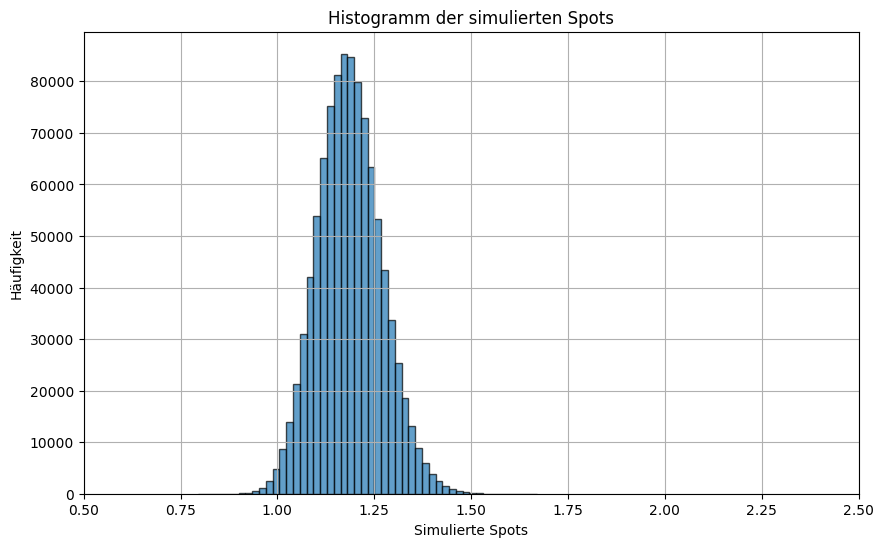

In [4]:
import matplotlib.pyplot as plt

# Plotten des Histogramms der simulierten Spots
plt.figure(figsize=(10, 6))
plt.hist(price_paths, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Simulierte Spots')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der simulierten Spots')
plt.xlim(0.5, 2.5)
plt.grid(True)
plt.show()

In [5]:
num_time_steps = 20  # Anzahl der Zeitschritte

# Berechnung der Zeitinkremente
dt = T / num_time_steps

# Generierung zufälliger Preiswege
price_paths = np.zeros((num_simulations, num_time_steps + 1))
price_paths[:, 0] = S

for t in range(1, num_time_steps + 1):
    z = np.random.normal(0, 1, num_simulations)
    price_paths[:, t] = price_paths[:, t - 1] * np.exp((r_usd - r_eur - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Berechnung des Payoffs für jede Simulation am Ende der Laufzeit
payoffs = np.maximum(price_paths[:, -1] - K, 0)

# Abzinsung der Payoffs auf den Barwert
discounted_payoffs = payoffs * np.exp(-r_usd * T)

# Berechnung des durchschnittlichen abgezinsten Payoffs, um den Call-Option-Preis zu erhalten
call_price_mc = np.mean(discounted_payoffs)

call_price_mc

0.040372092723667125

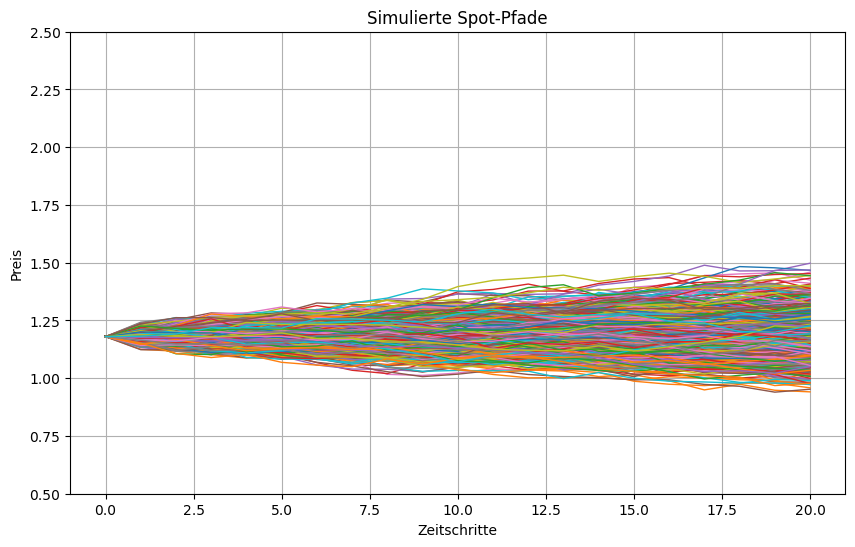

In [6]:
# Visualisierung der Pfade
plt.figure(figsize=(10, 6))
for i in range(1000):
    plt.plot(price_paths[i, :], lw=1)

plt.xlabel('Zeitschritte')
plt.ylabel('Preis')
plt.title('Simulierte Spot-Pfade')
plt.ylim(0.5,2.5)
plt.grid(True)
plt.show()


# Aufgabe 2
Wie verändert sich der Preis der Option, das Histogramm und die simulierten Pfade
* Wenn man die Volatilität verringert / erhöht
* Wenn man den USD - Zins verringert / erhöht
